# Final Plots

## Imports

In [1]:
!pip install pickle5

     |████████████████████████████████| 133kB 22.2MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219261 sha256=e10cf36a12b272f3f236d45cbb2ffd2b5de3168bd1f44504bc01f4d6dda8e276
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pickle5 as pickle
import torch

In [4]:
def save_as_pickle(obj, filename):
    """
    save an object in a pickle file dump
    :param obj: object to dump
    :param filename: target file
    :return:
    """
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, protocol=pickle.HIGHEST_PROTOCOL)


def load_pickle(filename):
    """
    load an object from a given pickle file
    :param filename: source file
    :return: loaded object
    """
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [5]:
drive.mount('/content/drive', force_remount=True)  # use force_remount=True param after upload of new data

# file and folder names
ir_project_drive_folder = "Master/2 - FSS 2021/Information Retrieval/IR Projekt"
# ir_project_drive_folder = "IR Projekt"
full_ir_project_drive_folder = "/content/drive/My Drive/{}/".format(ir_project_drive_folder)

# saved models
nr_models_folder = full_ir_project_drive_folder + 'saved_models/neural_retrieval'

# first cycle (random irrelevant)
training_loss_suffix = 'training_logs.pkl'
model_path_roberta_first_10000_10000_wd_2e = nr_models_folder + '/roberta_first_10000_10000_wd_2e/'
model_path_roberta_first_5000_15000_wd_2e = nr_models_folder + '/roberta_first_5000_15000_wd_2e/'
model_path_roberta_first_720_19280_wd_2e = nr_models_folder + '/roberta_first_720_19280_wd_2e/'

# second cycle (varying irrelevants)
model_path_roberta_second_5000_15000_wd_2e = nr_models_folder + '/roberta_second_5000_15000_wd_2e/'
model_path_roberta_second_randhard_5000_15000_wd_2e = nr_models_folder + '/roberta_second_randhard_5000_15000_wd_2e/'
model_path_roberta_second_maxhard_5000_15000_wd_2e = nr_models_folder + '/roberta_second_maxhard_5000_15000_wd_2e/'

# plots
plot_folder = nr_models_folder + '/plots/'
plot_first_cycle_path = plot_folder + 'first_cycle.png'
plot_second_cycle_path = plot_folder + 'second_cycle.png'
plot_scaling_difficulty_path = plot_folder + 'scaling_difficulty.png'

Mounted at /content/drive


## Methods

In [ ]:
def prepare_training_loss(model_path, filter_steps):
  logs = load_pickle(model_path + training_loss_suffix)
  losses = [log['loss'] for i, log in enumerate(logs) if i % filter_steps == 0]
  epochs = [log['epoch'] for i, log in enumerate(logs) if i % filter_steps == 0]
  return losses, epochs

In [ ]:
def get_map_x_values(map_values, upper_bound):
  """ get stretched x axis values for map values based on upper bound of training loss epoch """
  steps = [i for i in range(len(map_values))]
  scaled_steps = list(MinMaxScaler(feature_range=(0.25, upper_bound)).fit_transform(np.array(steps).reshape(-1, 1)).reshape(1, -1)[0])
  return scaled_steps

## First Cycle

In [ ]:
# prepare training losses
filter_steps = 5
losses_10000_10000, epochs_10000_10000 = prepare_training_loss(model_path_roberta_first_10000_10000_wd_2e, filter_steps)
print(len(losses_10000_10000))
losses_5000_15000, epochs_5000_15000 = prepare_training_loss(model_path_roberta_first_5000_15000_wd_2e, filter_steps)
print(len(losses_5000_15000))
losses_720_19280, epochs_720_19280 = prepare_training_loss(model_path_roberta_first_720_19280_wd_2e, filter_steps)
print(len(losses_720_19280))

# prepare map values (lookuped from results sheet)
maps_10000_10000 = [0.3495,0.2085,0.3199,0.3262,0.3523,0.2300,0.2258,0.3156,0.4546,0.3332,0.4651,0.3332,0.3273,0.3508,0.4033,0.3544,0.3633,0.4619,0.4146,0.4771]
maps_10000_10000_x = get_map_x_values(maps_10000_10000, max(epochs_10000_10000))
maps_5000_15000 = [0.2249,0.3536,0.2334,0.3111,0.2385,0.4646,0.5776,0.5280,0.4538,0.4630,0.6191,0.6560,0.7532,0.7610,0.3074,0.5581,0.7449,0.2093,0.7032,0.7010]
maps_5000_15000_x = get_map_x_values(maps_10000_10000, max(epochs_5000_15000))
maps_720_19280 = [0.1003,0.1506,0.6069,0.2934,0.4917,0.4891,0.4953,0.4374,0.6013,0.6740,0.5279,0.5753,0.6129,0.5743,0.5917,0.6109,0.5504,0.6543,0.7135,0.6628]
maps_720_19280_x = get_map_x_values(maps_10000_10000, max(epochs_720_19280))

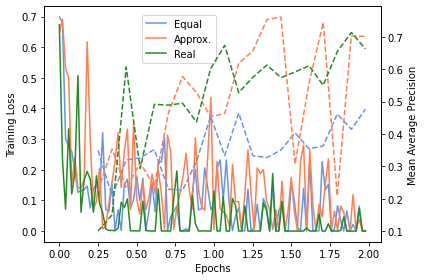

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss')
ax1.plot(epochs_10000_10000, losses_10000_10000, label='Equal', color='cornflowerblue')
ax1.plot(epochs_5000_15000, losses_5000_15000, label='Approx.', color='coral')
ax1.plot(epochs_720_19280, losses_720_19280, label='Real', color='forestgreen')
ax1.legend(loc=(0.29, 0.76))

ax2 = ax1.twinx() 
ax2.set_ylabel('Mean Average Precision')
ax2.plot(maps_10000_10000_x, maps_10000_10000, '--', color='cornflowerblue')
ax2.plot(maps_5000_15000_x, maps_5000_15000, '--', color='coral')
ax2.plot(maps_720_19280_x, maps_720_19280, '--', color='forestgreen')

fig.tight_layout()
plt.savefig(plot_first_cycle_path)
plt.show()

## Second Cycle

In [ ]:
# prepare training losses
filter_steps = 5
losses_irrelevant_random, epochs_irrelevant_random = prepare_training_loss(model_path_roberta_second_5000_15000_wd_2e, filter_steps)
losses_irrelevant_hard_random, epochs_irrelevant_hard_random = prepare_training_loss(model_path_roberta_second_randhard_5000_15000_wd_2e, filter_steps)
losses_irrelevant_hard_max, epochs_irrelevant_hard_max = prepare_training_loss(model_path_roberta_second_maxhard_5000_15000_wd_2e, filter_steps)

# prepare map values (lookuped from results sheet)
maps_irrelevant_random = [0.3552,0.3833,0.4172,0.4076,0.7277,0.7383,0.3725,0.4732,0.5084,0.6423,0.5512,0.5247,0.6348,0.4629,0.6814,0.5892,0.5937,0.4705,0.5555,0.5153]
maps_irrelevant_random_x = get_map_x_values(maps_irrelevant_random, max(epochs_irrelevant_random))
maps_irrelevant_hard_random = [0.7878,0.7920,0.7920,0.8061,0.8040,0.8017,0.8004,0.8122,0.8189,0.8156,0.8122,0.8139,0.8171,0.8174,0.8231,0.8117,0.8179,0.8164,0.8161,0.8204]
maps_irrelevant_hard_random_x = get_map_x_values(maps_irrelevant_hard_random, max(epochs_irrelevant_hard_random))
maps_irrelevant_hard_max = [0.7812,0.7591,0.745,0.7354,0.7467,0.7163,0.7668,0.7325,0.7048,0.7167,0.6796,0.7194,0.7275,0.7397,0.7443,0.7324,0.7271,0.7266,0.7182,0.7234]
maps_irrelevant_hard_max_x = get_map_x_values(maps_irrelevant_hard_max, max(epochs_irrelevant_hard_max))

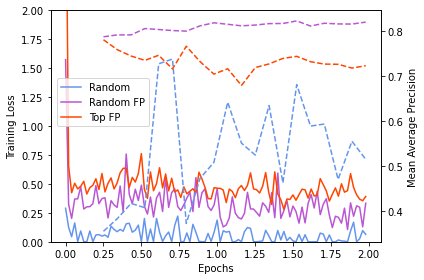

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss')
ax1.plot(epochs_irrelevant_random, losses_irrelevant_random, label='Random', color='cornflowerblue')
ax1.plot(epochs_irrelevant_hard_random, losses_irrelevant_hard_random, label='Random FP', color='mediumorchid')
ax1.plot(epochs_irrelevant_hard_max, losses_irrelevant_hard_max, label='Top FP', color='orangered')
ax1.set_ylim(0, 2)
ax1.legend(loc=(0.02, 0.5))

ax2 = ax1.twinx() 
ax2.set_ylabel('Mean Average Precision')
ax2.plot(maps_irrelevant_random_x, maps_irrelevant_random, '--', color='cornflowerblue')
ax2.plot(maps_irrelevant_hard_random_x, maps_irrelevant_hard_random, '--', color='mediumorchid')
ax2.plot(maps_irrelevant_hard_max_x, maps_irrelevant_hard_max, '--', color='orangered')

fig.tight_layout() 
plt.savefig(plot_second_cycle_path)
plt.show()

## Difficulty Function Plot

In [6]:
size = 10000
probabilities = lambda hardness_factor, len: [i**hardness_factor / len**hardness_factor for i in range(len)]

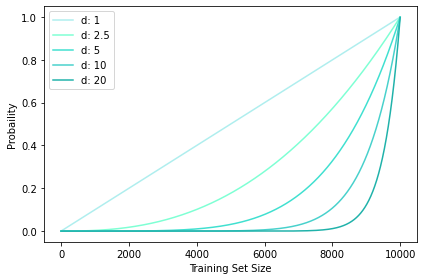

In [7]:
indexes = [i for i in range(size)]
hard_probabilities_1 = probabilities(1, size)
hard_probabilities_25 = probabilities(2.5, size)
hard_probabilities_5 = probabilities(5, size)
hard_probabilities_10 = probabilities(10, size)
hard_probabilities_20 = probabilities(20, size)
plt.plot(indexes, hard_probabilities_1, color='paleturquoise', label='d: 1') 
plt.plot(indexes, hard_probabilities_25, color='aquamarine', label='d: 2.5') 
plt.plot(indexes, hard_probabilities_5, color='turquoise', label='d: 5') 
plt.plot(indexes, hard_probabilities_10, color='mediumturquoise', label='d: 10') 
plt.plot(indexes, hard_probabilities_20, color='lightseagreen', label='d: 20') 
plt.legend(loc='upper left')
# plt.title("Probability of sampling difficult examples in irrelevant samples")
plt.xlabel("Training Set Size")
plt.ylabel("Probaility")

plt.tight_layout()
plt.savefig(plot_scaling_difficulty_path)
plt.show()